In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plt.rcParams["figure.figsize"] = (14,4)

In [10]:
data = pd.read_csv("../data/base_limpia.csv", parse_dates=["tiempo", "fecha pedido", "fecha liq"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301394 entries, 0 to 301393
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tiempo           301394 non-null  datetime64[ns]
 1   nro factura      301394 non-null  int64         
 2   cliente          301394 non-null  int64         
 3   categoria        301394 non-null  object        
 4   tipo negocio     301394 non-null  object        
 5   localidad        301394 non-null  object        
 6   direccion        301394 non-null  object        
 7   plaza/campaña    301394 non-null  object        
 8   producto         301394 non-null  int64         
 9   nro pedido       301394 non-null  int64         
 10  fecha pedido     301394 non-null  datetime64[ns]
 11  u pedidas        301394 non-null  int64         
 12  kg pedidos       301394 non-null  float64       
 13  fecha liq        301394 non-null  datetime64[ns]
 14  u entregadas     301

In [12]:
#data = data.drop(columns=["Unnamed: 0", "nro factura"])

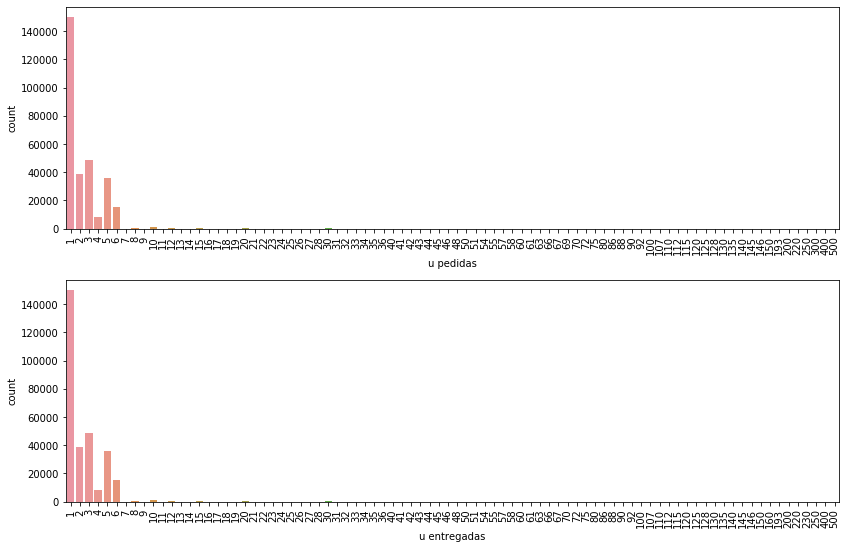

In [13]:
f, ax = plt.subplots(2, 1, figsize=(12, 8))
f.tight_layout(pad=3.0)
sns.countplot(x="u pedidas", data=data, ax=ax[0])
ax[0].tick_params("x", labelrotation=90)
sns.countplot(x="u entregadas", data=data, ax=ax[1])
ax[1].tick_params("x", labelrotation=90);

In [14]:
(data["u entregadas"] != data["u pedidas"]).sum()

126

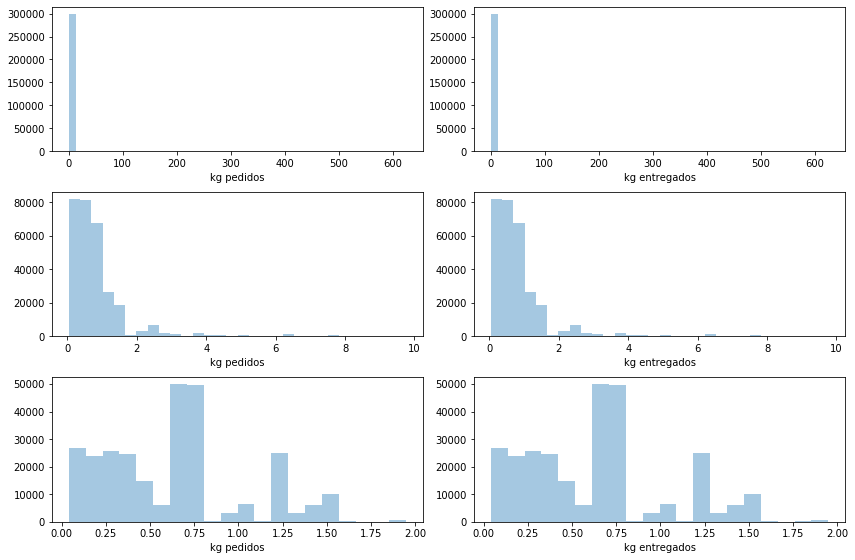

In [15]:
f, ax = plt.subplots(3, 2, figsize=(12,8))
f.tight_layout(pad=2.0)
sns.distplot(data["kg pedidos"], kde=False, ax=ax[0,0])
ax[1,0] = sns.distplot(data.loc[data["kg pedidos"] < 10, "kg pedidos"], bins=30, kde=False, ax=ax[1,0])
ax[2,0] = sns.distplot(data.loc[data["kg pedidos"] < 2, "kg pedidos"], bins=20, kde=False, ax=ax[2,0])
ax[0,1] = sns.distplot(data["kg entregados"], kde=False, ax=ax[0,1])
ax[1,1] = sns.distplot(data.loc[data["kg entregados"] < 10, "kg entregados"], bins=30, kde=False, ax=ax[1,1])
ax[2,1] = sns.distplot(data.loc[data["kg entregados"] < 2, "kg entregados"], bins=20, kde=False, ax=ax[2,1])

In [16]:
(data["kg entregados"] != data["kg pedidos"]).sum()

126

In [17]:
clientes = data[["cliente", "categoria", "tipo negocio"]].drop_duplicates(subset="cliente")
len(clientes)

5478

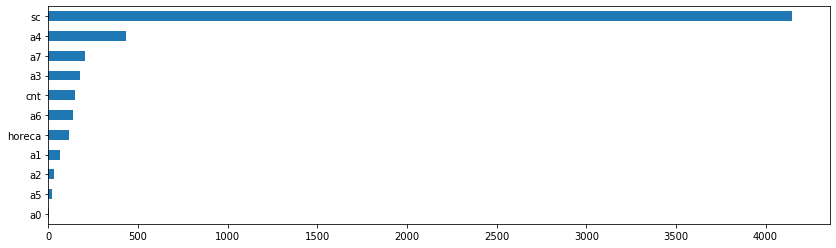

In [18]:
clientes["categoria"].value_counts(ascending=True).plot(kind="barh");

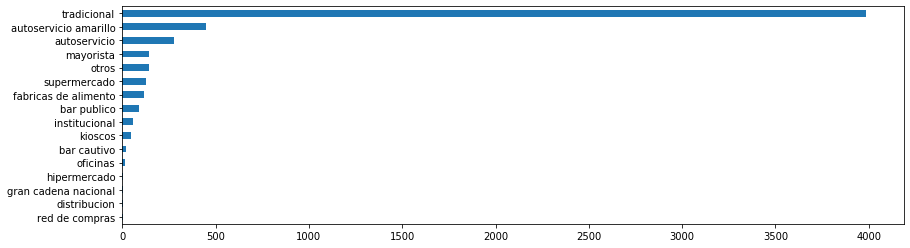

In [19]:
clientes["tipo negocio"].value_counts(ascending=True).plot(kind="barh");

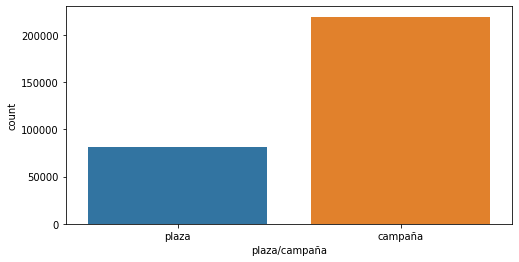

In [20]:
f = plt.figure(figsize=(8,4))
sns.countplot(x="plaza/campaña", data=data)

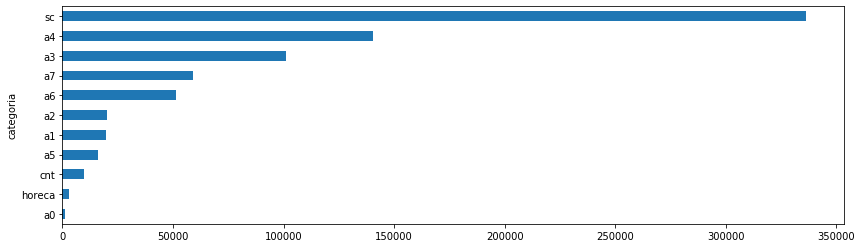

In [21]:
data.groupby("categoria")["u pedidas"].sum().sort_values(ascending=True).plot(kind="barh");

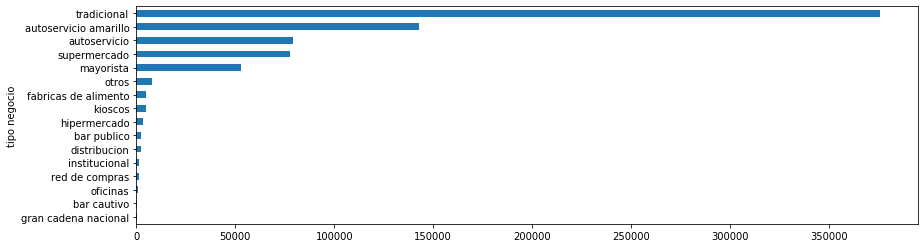

In [22]:
data.groupby("tipo negocio")["u pedidas"].sum().sort_values(ascending=True).plot(kind="barh");

In [23]:
u_por_cliente = data.groupby("cliente")["u pedidas"].sum().sort_values(ascending=False).reset_index()

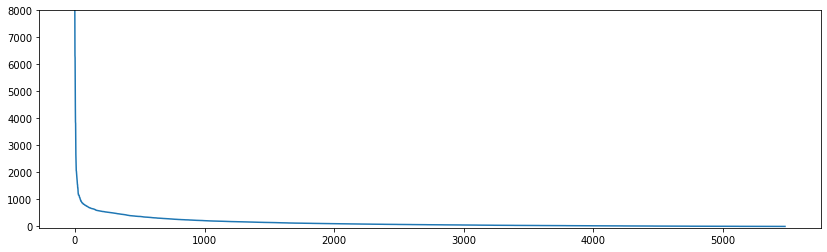

In [24]:
u_por_cliente["u pedidas"].plot(kind="line", ylim=(-50,8000))

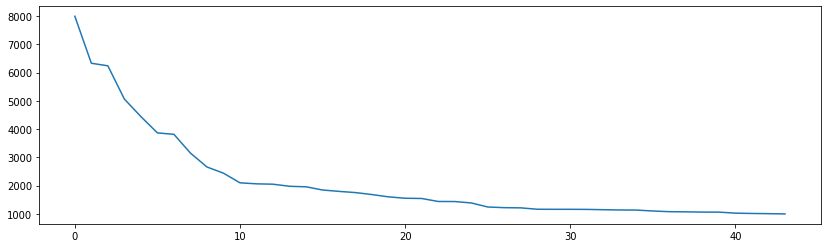

In [25]:
u_por_cliente.loc[u_por_cliente["u pedidas"] >= 1000, "u pedidas"].plot(kind="line");

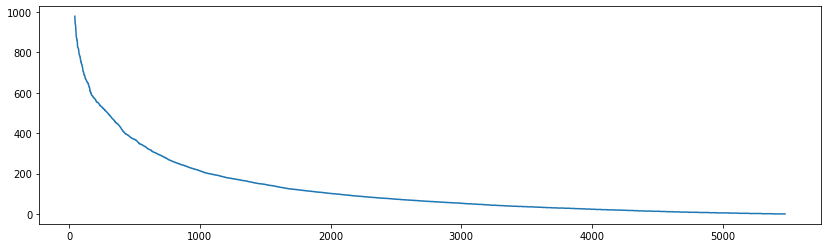

In [26]:
u_por_cliente.loc[u_por_cliente["u pedidas"] < 1000, "u pedidas"].plot(kind="line");

In [27]:
u_por_cliente["u pedidas"].describe()

count    5478.000000
mean      138.509493
std       277.090571
min         1.000000
25%        22.000000
50%        63.000000
75%       161.000000
max      7992.000000
Name: u pedidas, dtype: float64

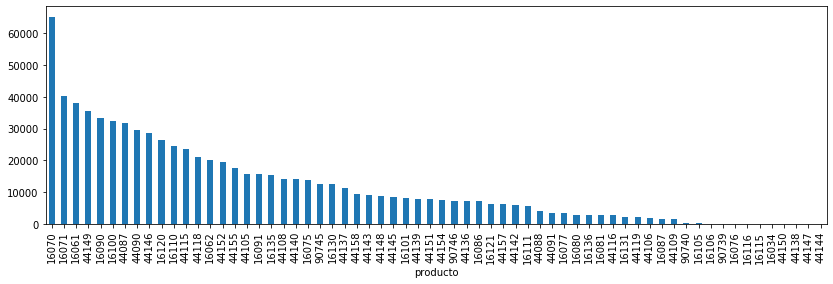

In [28]:
data.groupby("producto")["u pedidas"].sum().sort_values(ascending=False).plot(kind="bar");

In [29]:
data.groupby("producto")["u pedidas"].sum().sort_values(ascending=False).head(20)

producto
16070    65209
16071    40385
16061    38228
44149    35625
16090    33246
16100    32401
44087    31786
44090    29593
44146    28763
16120    26563
16110    24478
44115    23585
44118    21197
16062    20261
44152    19494
44155    17522
44105    15784
16091    15684
16135    15277
44108    14299
Name: u pedidas, dtype: int64

In [30]:
data.groupby("producto")["u pedidas"].sum().sort_values(ascending=False).tail(20)

producto
16136    2784
16081    2772
44116    2654
16131    2309
44119    2136
44106    1764
16087    1624
44109    1494
90740     252
16105     201
16106      80
90739      67
16076      32
16116      28
16115      23
16034      17
44150       4
44138       4
44147       2
44144       2
Name: u pedidas, dtype: int64

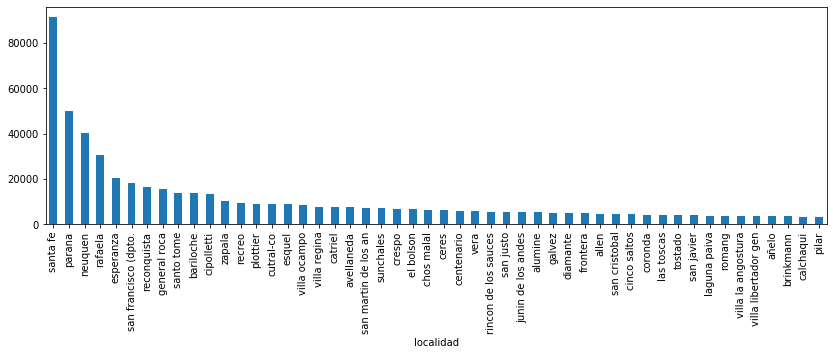

In [31]:
data.groupby("localidad")["u pedidas"].sum().sort_values(ascending=False).head(50).plot(kind="bar");

In [23]:
data = data.set_index("tiempo").sort_index()

In [37]:
serie_total = data.groupby("tiempo")["u pedidas"].sum()
tendencia_total = serie_total.rolling(window=7).mean()

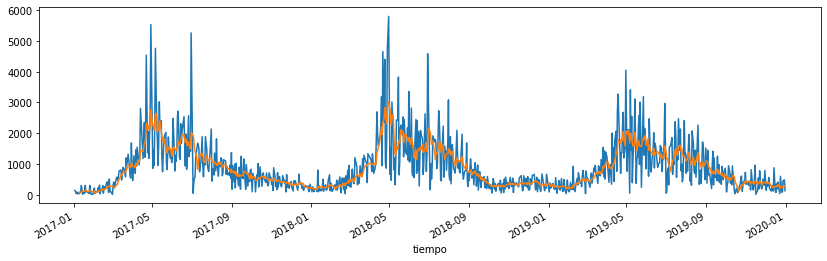

In [39]:
serie_total.plot()
tendencia_total.plot();

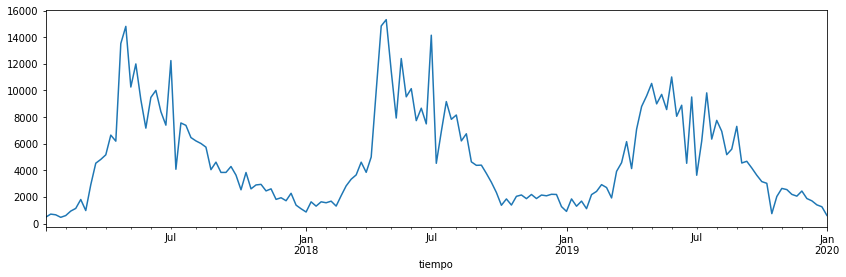

In [41]:
serie_total.resample("W").sum().plot()

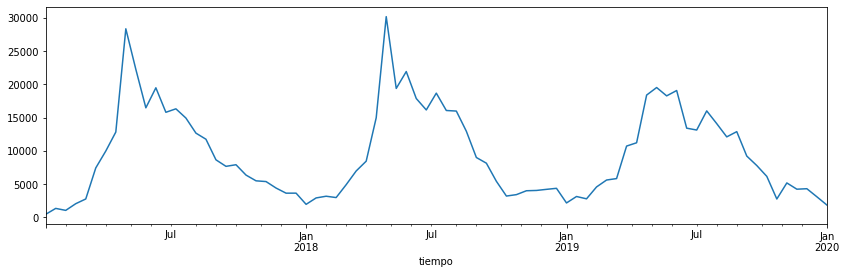

In [42]:
serie_total.resample("2W").sum().plot()

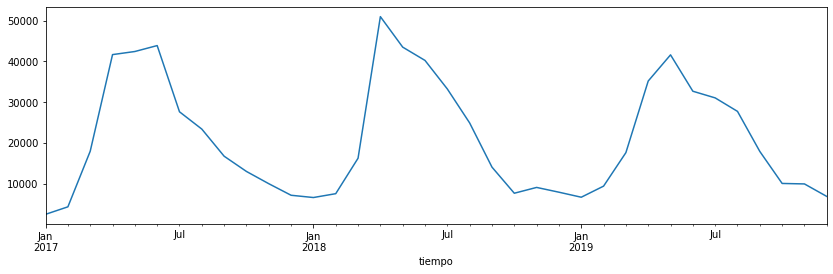

In [43]:
serie_total.resample("M").sum().plot()

In [25]:
series_por_producto = data.groupby(["tiempo", "producto"])["u pedidas"].sum().unstack().fillna(0)
tendencias_por_producto = series_por_producto.rolling(window=7).mean()

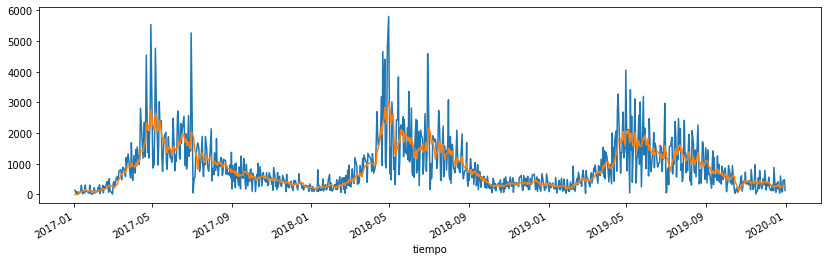

In [26]:
series_por_producto.sum(axis=1).plot()
tendencias_por_producto.sum(axis=1).plot();

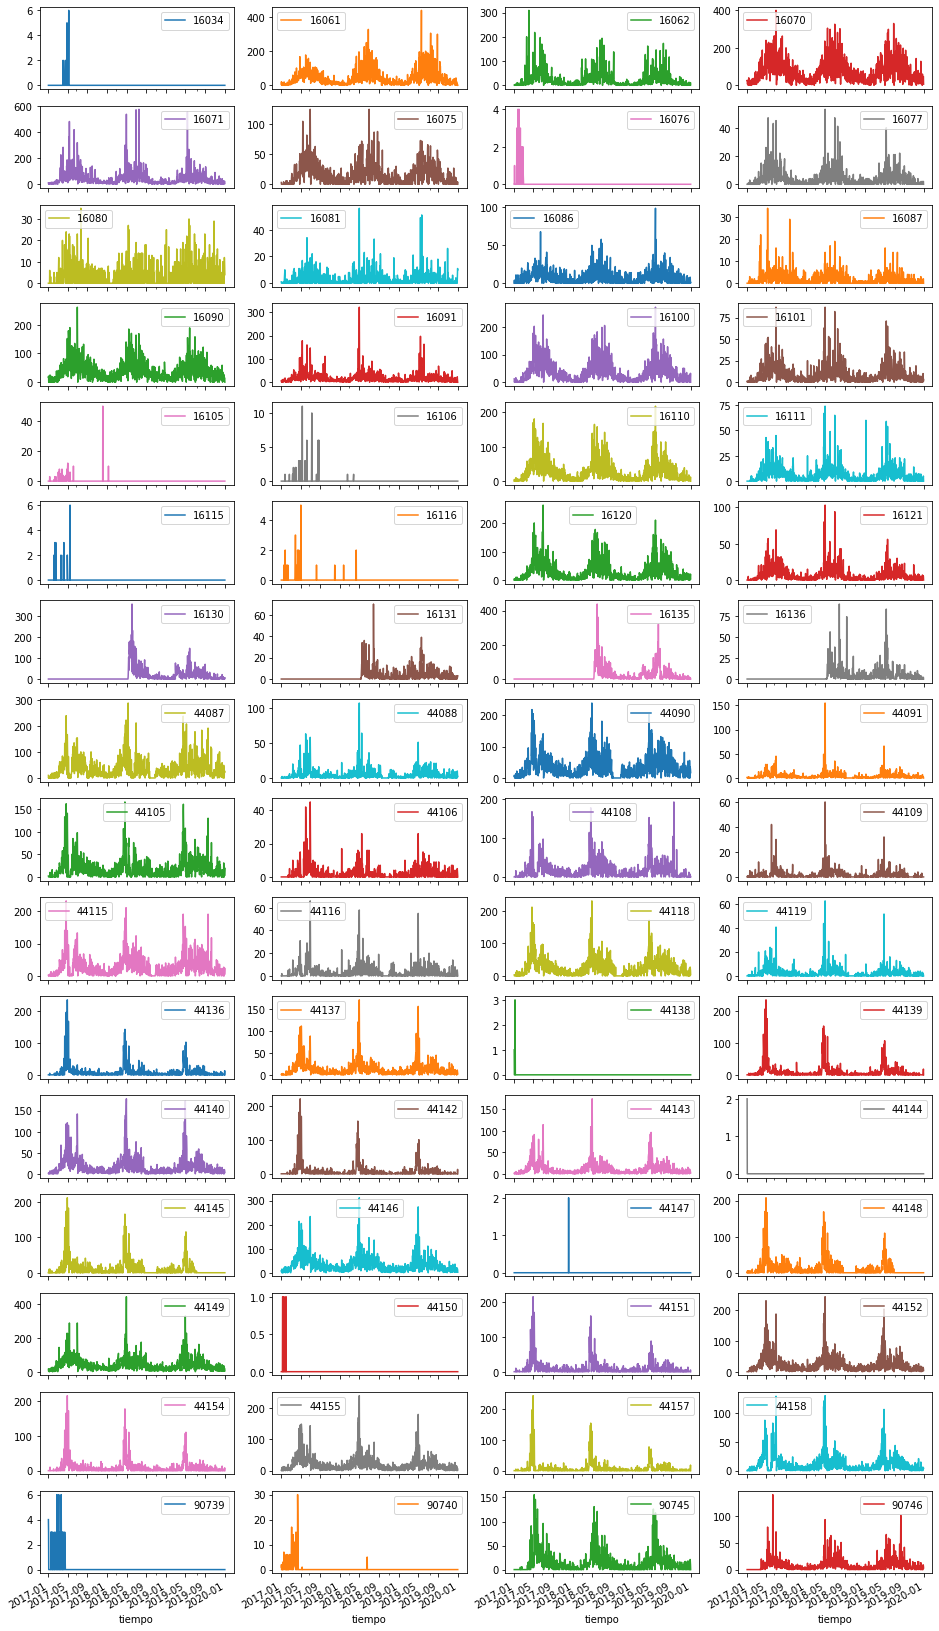

In [27]:
series_por_producto.plot(subplots=True, layout=(16,4), figsize=(16,32));

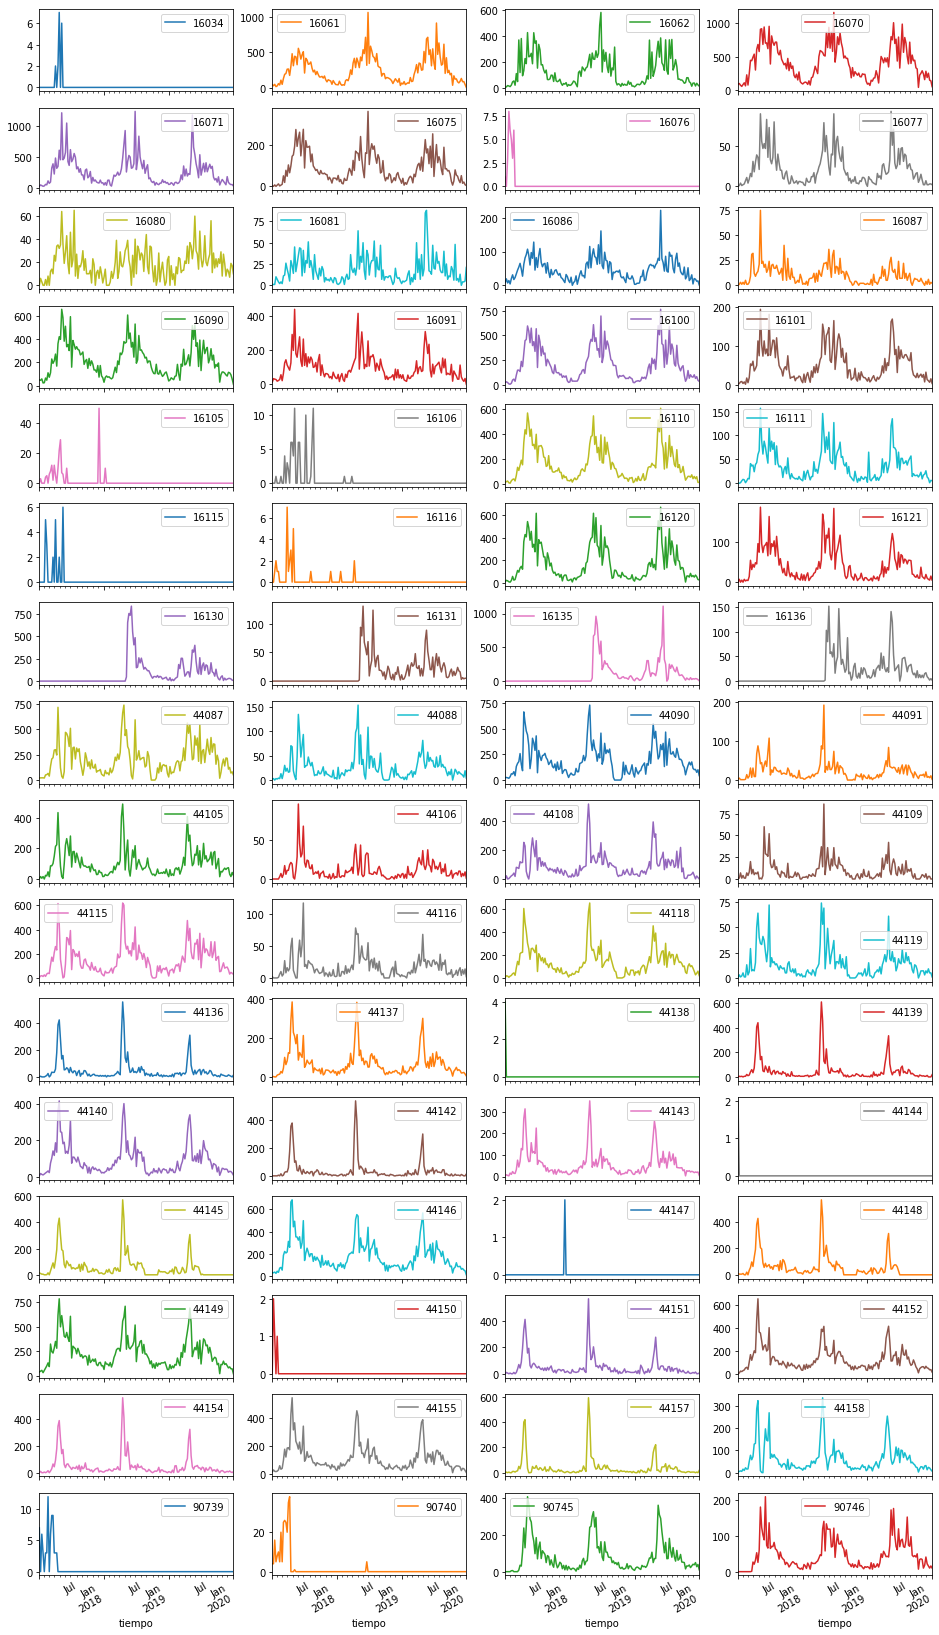

In [51]:
series_por_producto.resample("W").sum().plot(subplots=True, layout=(16,4), figsize=(16,32));

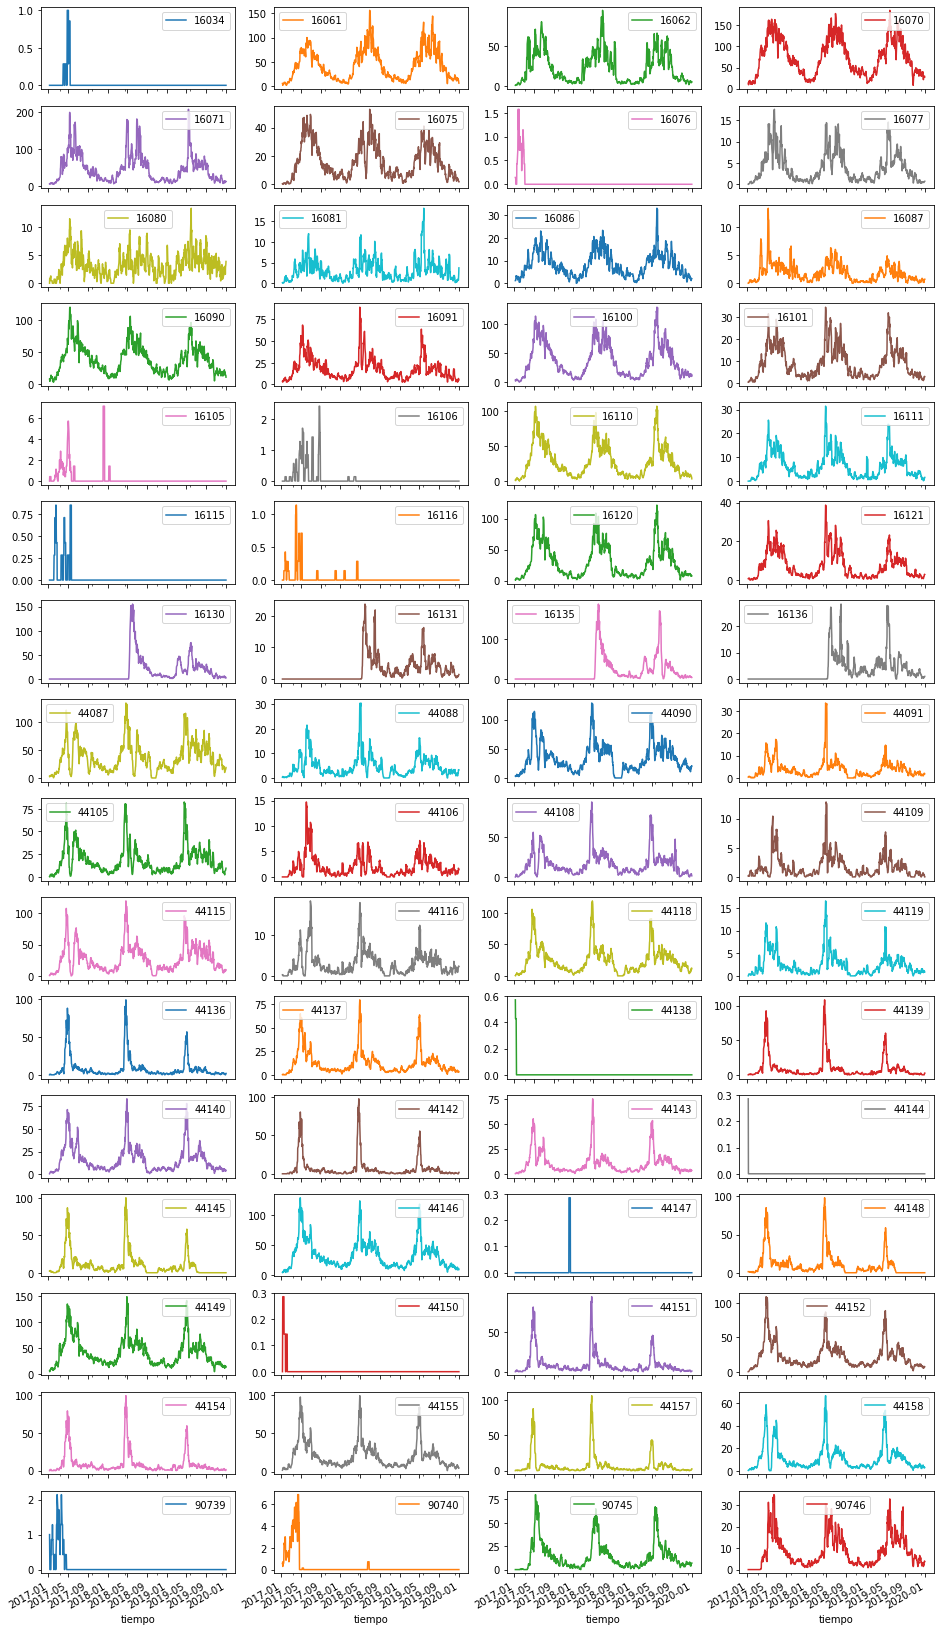

In [28]:
tendencias_por_producto.plot(subplots=True, layout=(16,4), figsize=(16,32));

In [29]:
series_por_categoria = data.groupby(["tiempo", "categoria"])["u pedidas"].sum().unstack().fillna(0)
tendencias_por_categoria = series_por_categoria.rolling(window=15).mean()

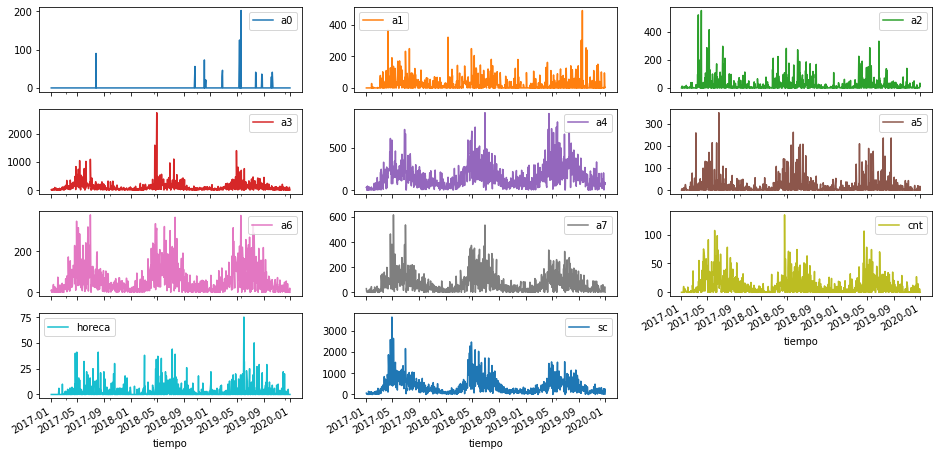

In [30]:
series_por_categoria.plot(subplots=True, layout=(4,3), figsize=(16,8));

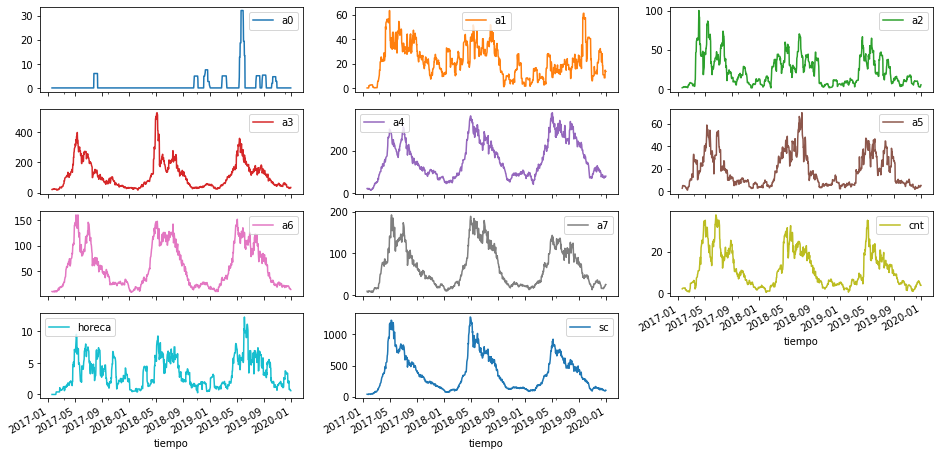

In [31]:
tendencias_por_categoria.plot(subplots=True, layout=(4,3), figsize=(16,8));

In [32]:
series_por_negocio = data.groupby(["tiempo", "tipo negocio"])["u pedidas"].sum().unstack().fillna(0)
tendencias_por_negocio = series_por_negocio.rolling(window=15).mean()

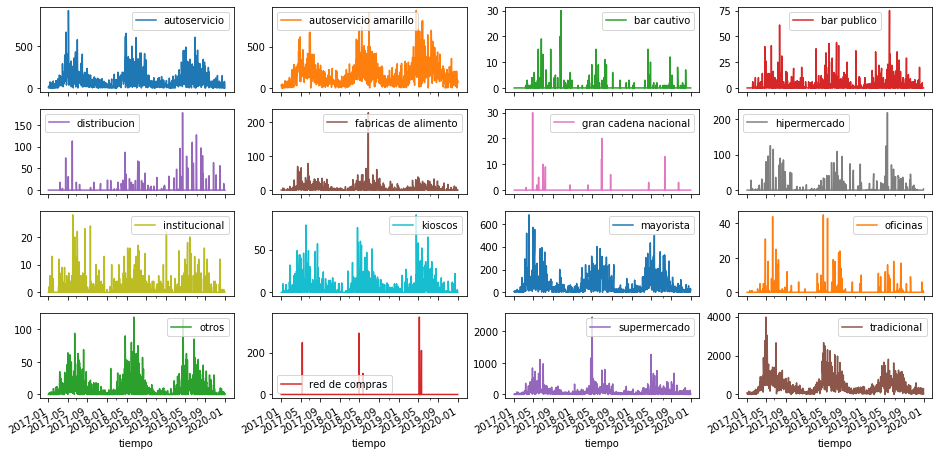

In [33]:
series_por_negocio.plot(subplots=True, layout=(4,4), figsize=(16,8));

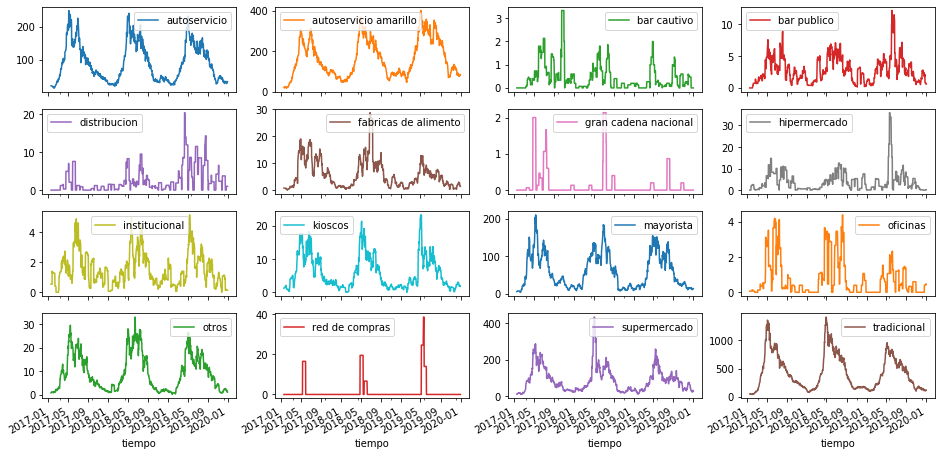

In [34]:
tendencias_por_negocio.plot(subplots=True, layout=(4,4), figsize=(16,8));

In [57]:
data.groupby("cliente")["u pedidas"].sum()

cliente
200008863     15
200008864    444
200008865     68
200008866     10
200008867    178
            ... 
300011654     74
300011686      6
300011704      5
300011722     22
300011757      8
Name: u pedidas, Length: 5478, dtype: int64

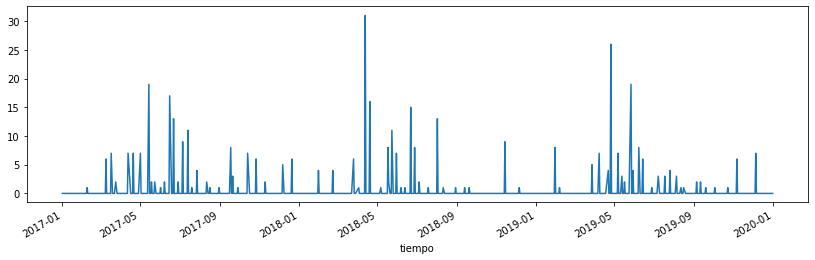

In [68]:
data.groupby(["tiempo","cliente"])["u pedidas"].sum().unstack()[200008864].fillna(0).plot()

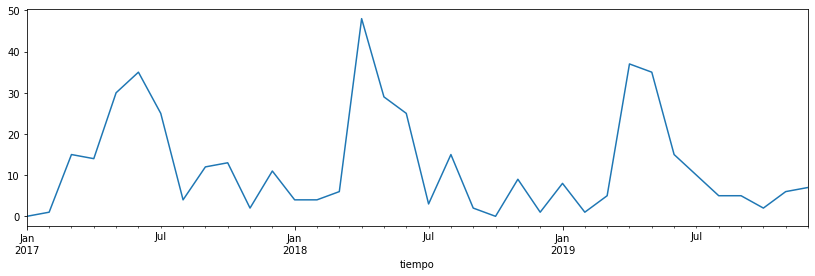

In [70]:
data.groupby(["tiempo","cliente"])["u pedidas"].sum().unstack()[200008864].fillna(0).resample("M").sum().plot()

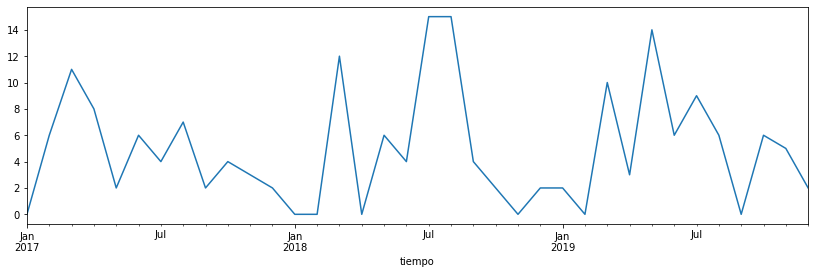

In [75]:
data.groupby(["tiempo","cliente"])["u pedidas"].sum().unstack()[200008867].fillna(0).resample("M").sum().plot()

In [77]:
data.groupby("localidad")["u pedidas"].sum()

localidad
alcaraz                 286
alcaraz norte           170
alcaraz segundo          85
aldao                    87
aldea brasilera         617
                      ...  
virginia                 34
vista alegre norte       11
vista alegre sur        208
zapala                10171
zenon pereyra           387
Name: u pedidas, Length: 319, dtype: int64

In [90]:
unidades_por_localidad = data.groupby("localidad")["u pedidas"].sum().sort_values(ascending=False)
unidades_por_localidad[unidades_por_localidad > 1000]

localidad
santa fe             91316
parana               49811
neuquen              40233
rafaela              30800
esperanza            20495
                     ...  
villa trinidad        1075
valcheta              1070
hersilia              1054
san carlos centro     1014
monte vera            1014
Name: u pedidas, Length: 125, dtype: int64

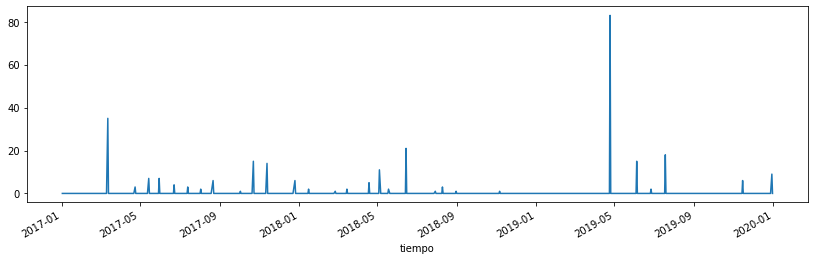

In [78]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["alcaraz"].fillna(0).plot()

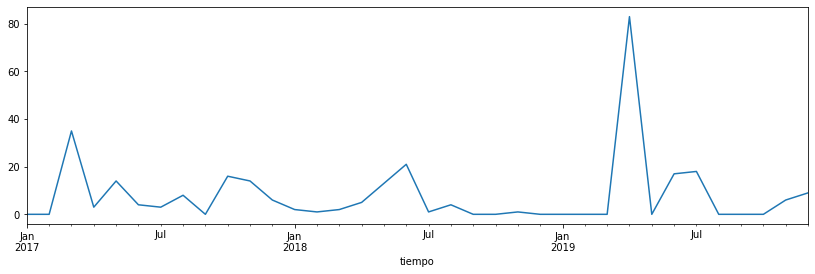

In [80]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["alcaraz"].fillna(0).resample("M").sum().plot()

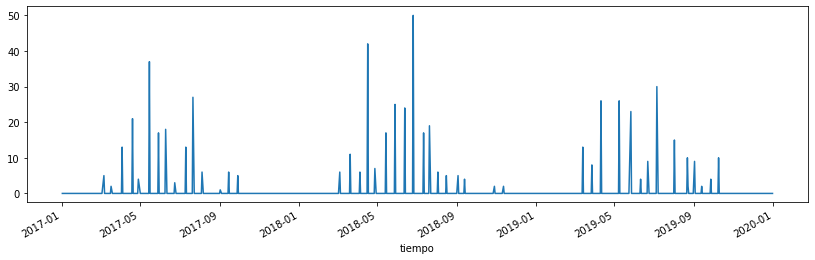

In [81]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["aldea brasilera"].fillna(0).plot()

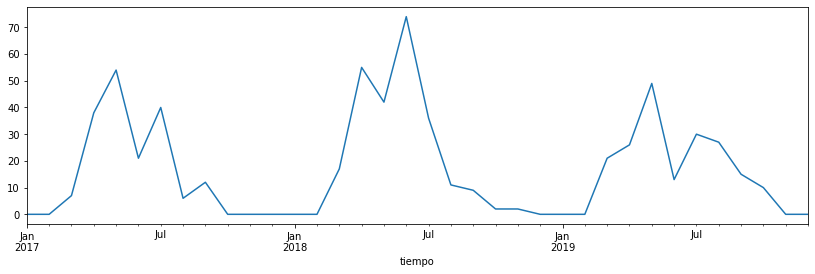

In [84]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["aldea brasilera"].fillna(0).resample("M").sum().plot()

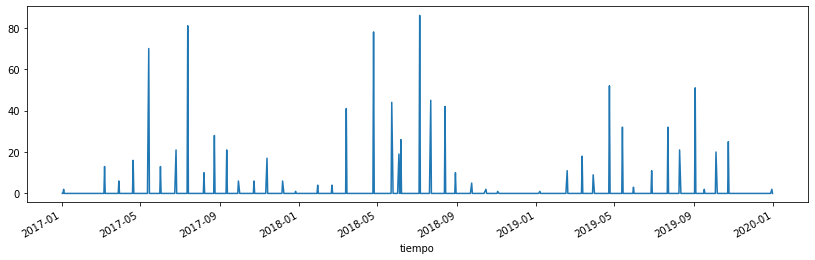

In [91]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["monte vera"].fillna(0).plot()

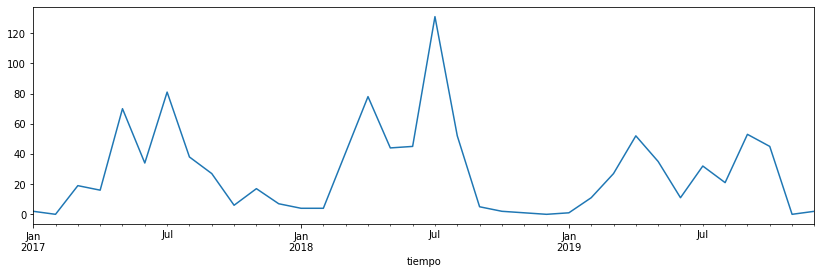

In [92]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["monte vera"].fillna(0).resample("M").sum().plot()

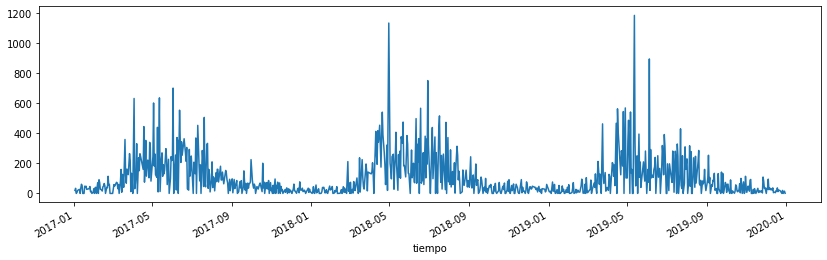

In [94]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["santa fe"].fillna(0).plot()

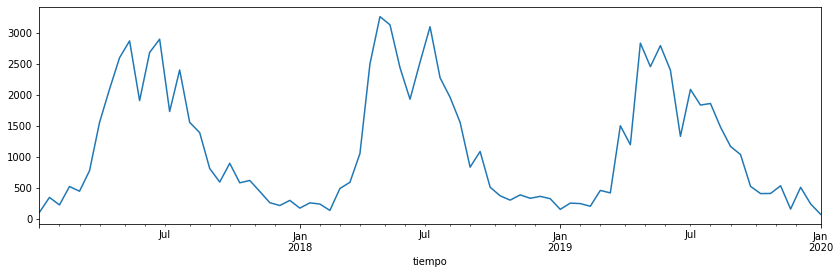

In [98]:
data.groupby(["tiempo","localidad"])["u pedidas"].sum().unstack()["santa fe"].fillna(0).resample("2W").sum().plot()